In [27]:
import tqdm
import librosa
import numpy as np
import pydub

def split_audio_file_with_vad(audio_file_path, output_dir="./output", show_progress=True):
  """Splits an audio file into segments when the speaker is not talking.

  Args:
    audio_file_path: The path to the audio file.
    output_dir: The directory where the output segments will be saved.
    show_progress: Whether to show a progress bar.

  Returns:
    A list of audio segments, and the timebar of the function.
  """

  # Load the audio file.
  audio, sr = librosa.load(audio_file_path)

  # Convert the audio file to a wav file.
  wav_file = pydub.AudioSegment.from_file(audio_file_path)

  # Detect silence in the audio file.
  silences = pydub.silence.detect_silence(wav_file)

  # Split the audio file into segments.
  segments = []
  timebar = []
  for start, end in silences:
    segments.append(wav_file[start:end])
    timebar.append((start, end))

  # Save the segments to the output directory.
  for i, segment in enumerate(segments):
    librosa.output.write_wav(f"{output_dir}/segment_{i}.wav", segment, sr)

  return segments, timebar



In [1]:
audio_path="audio/Botanicario - Ribes Nero.wav"
output_path='audio/out'

In [28]:
segments, timebar=split_audio_file_with_vad(audio_file_path=audio_path,output_dir=output_path)

AttributeError: No librosa attribute output

In [8]:
import librosa

def split_audio_on_silence(audio_file, silence_threshold=-10, min_silence_duration=0.25):
    y, sr = librosa.load(audio_file)
    intervals = librosa.effects.split(y, top_db=silence_threshold, frame_length=int(sr*min_silence_duration))
    return [y[start:end] for start, end in intervals]


In [9]:
split_audio_on_silence(audio_path)

[]

In [12]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

def plot_audio(audio_file):
    y, sr = librosa.load(audio_file)
    time = np.arange(0, len(y)) / sr
    plt.figure()
    plt.plot(time / 60, y)
    plt.title('Audio Waveform')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Amplitude')
    plt.show()


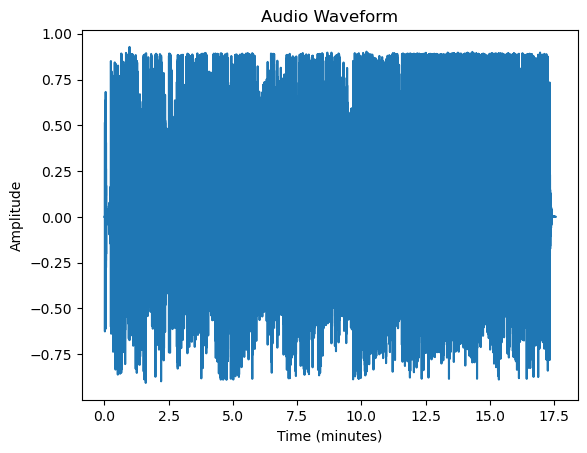

In [13]:
plot_audio(audio_path)